In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import folium

In [ ]:
df = pd.read_csv('dataset/dfTransjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [ ]:
print(df.isnull().sum())

df_drop = df.dropna()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [ ]:
df_eda = df_drop

In [ ]:
df_eda['tapInTime'] = pd.to_datetime(df_eda['tapInTime'])
df_eda['tapOutTime'] = pd.to_datetime(df_eda['tapOutTime'])
df_eda['tapInHour'] = df_eda['tapInTime'].dt.hour
df_eda['tapOutHour'] = df_eda['tapOutTime'].dt.hour
df_eda['tapDay'] = df_eda['tapInTime'].dt.dayofweek
df_eda.head()

c:\Users\user\Miniconda3\envs\fikri\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,0


In [ ]:
df_eda['tapDay'] = df_eda['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
df_eda.head()

c:\Users\user\Miniconda3\envs\fikri\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday


In [ ]:
customer = df_eda[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31730 entries, 0 to 37899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       31730 non-null  object
 1   payCardBirthDate  31730 non-null  int64 
 2   payCardBank       31730 non-null  object
 3   payCardSex        31730 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
customer.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,Bajragin Usada,2008,emoney,M
1,Gandi Widodo,1997,dki,F
2,Emong Wastuti,1992,dki,F
3,Surya Wacana,1978,flazz,F
4,Embuh Mardhiyah,1982,flazz,M


In [ ]:
customer['age'] = 2025 - customer['payCardBirthDate']
customer.head()

c:\Users\user\Miniconda3\envs\fikri\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,Bajragin Usada,2008,emoney,M,15
1,Gandi Widodo,1997,dki,F,26
2,Emong Wastuti,1992,dki,F,31
3,Surya Wacana,1978,flazz,F,45
4,Embuh Mardhiyah,1982,flazz,M,41


In [ ]:
cust_bank = customer.payCardBank.value_counts().reset_index(name='count')
cust_bank

,index,count
0,dki,15702
1,emoney,5813
2,brizzi,2922
3,flazz,2667
4,online,2364
5,bni,2262


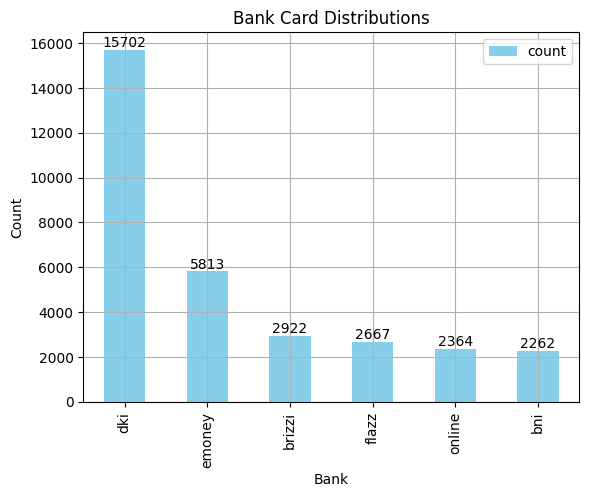

In [ ]:
ax = cust_bank.plot(x='index', kind='bar', color='skyblue')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(cust_bank['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Bank')
plt.ylabel('Count')
plt.title('Bank Card Distributions')
plt.show()

In [ ]:
cust_bank['percentage'] = (cust_bank['count'] / cust_bank['count'].sum()) * 100
cust_bank

,index,count,percentage
0,dki,15702,49.486291
1,emoney,5813,18.320202
2,brizzi,2922,9.208951
3,flazz,2667,8.405295
4,online,2364,7.450362
5,bni,2262,7.128900


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31730 entries, 0 to 37899
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       31730 non-null  object
 1   payCardBirthDate  31730 non-null  int64 
 2   payCardBank       31730 non-null  object
 3   payCardSex        31730 non-null  object
 4   age               31730 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
cust_age = customer[['payCardName', 'age']].groupby('age').size().reset_index(name='count')
cust_age

,age,count
0,11,690
1,12,630
2,13,637
3,14,641
4,15,688
...,...,...
61,72,40
62,74,7
63,75,68
64,76,15


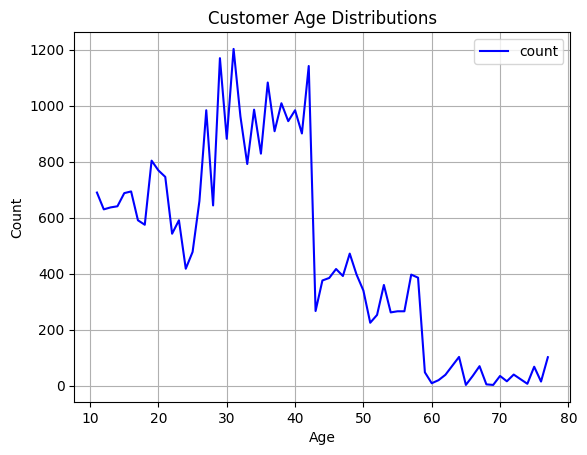

In [ ]:
ax = cust_age.plot(x='age', kind='line', color='blue')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Distributions')
plt.show()

In [ ]:
cust_sex = customer.groupby(['payCardSex', 'age'])['payCardName'].count().reset_index(name='count').sort_values(by='count', ascending=False)
cust_sex.groupby('payCardSex').size()

payCardSex
F    55
M    64
dtype: int64

In [ ]:
df_eda = df_eda.merge(customer[['payCardName', 'age']], on='payCardName')

In [ ]:
data = df_eda[['payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate','tapInStops', 'tapInStopsName','tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tapDay', 'age']]
clv = data[['payCardName', 'tapOutTime', 'payAmount']]
clv

,payCardName,tapOutTime,payAmount
0,Bajragin Usada,2023-04-03 06:00:53,3500.0
1,Bajragin Usada,2023-04-03 06:00:53,3500.0
2,Bajragin Usada,2023-04-03 06:00:53,3500.0
3,Bajragin Usada,2023-04-03 06:00:53,3500.0
4,Bajragin Usada,2023-04-03 06:00:53,3500.0
...,...,...,...
969293,Kamila Mahendra,2023-04-21 19:55:49,3500.0
969294,Titi Siregar,2023-04-18 22:28:22,3500.0
969295,drg. Zahra Nashiruddin,2023-04-04 13:27:25,20000.0
969296,Ana Agustina,2023-04-15 20:27:50,0.0


In [ ]:
# Calculate Recency (R)
max_date = clv['tapOutTime'].max()
clv['Recency'] = (max_date - clv['tapOutTime']).dt.days
clv

c:\Users\user\Miniconda3\envs\fikri\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,payCardName,tapOutTime,payAmount,Recency
0,Bajragin Usada,2023-04-03 06:00:53,3500.0,27
1,Bajragin Usada,2023-04-03 06:00:53,3500.0,27
2,Bajragin Usada,2023-04-03 06:00:53,3500.0,27
3,Bajragin Usada,2023-04-03 06:00:53,3500.0,27
4,Bajragin Usada,2023-04-03 06:00:53,3500.0,27
...,...,...,...,...
969293,Kamila Mahendra,2023-04-21 19:55:49,3500.0,9
969294,Titi Siregar,2023-04-18 22:28:22,3500.0,12
969295,drg. Zahra Nashiruddin,2023-04-04 13:27:25,20000.0,26
969296,Ana Agustina,2023-04-15 20:27:50,0.0,15


In [ ]:
# Calculate Frequency (F)
frequency = clv['payCardName'].value_counts().reset_index()
frequency.columns = ['payCardName', 'Frequency']
clv = clv.merge(frequency, on='payCardName')
clv

,payCardName,tapOutTime,payAmount,Recency,Frequency
0,Bajragin Usada,2023-04-03 06:00:53,3500.0,27,1225
1,Bajragin Usada,2023-04-03 06:00:53,3500.0,27,1225
2,Bajragin Usada,2023-04-03 06:00:53,3500.0,27,1225
3,Bajragin Usada,2023-04-03 06:00:53,3500.0,27,1225
4,Bajragin Usada,2023-04-03 06:00:53,3500.0,27,1225
...,...,...,...,...,...
969293,Kamila Mahendra,2023-04-21 19:55:49,3500.0,9,1
969294,Titi Siregar,2023-04-18 22:28:22,3500.0,12,1
969295,drg. Zahra Nashiruddin,2023-04-04 13:27:25,20000.0,26,1
969296,Ana Agustina,2023-04-15 20:27:50,0.0,15,1


In [ ]:
clv_ = df_eda.groupby('payCardName')['payAmount'].sum().reset_index().sort_values(by='payAmount', ascending=False, ignore_index=True)
clv_

,payCardName,payAmount
0,Tirta Siregar,28880000.0
1,Lanang Prastuti,28880000.0
2,Jaswadi Suartini,28880000.0
3,dr. Cayadi Yuliarti,28880000.0
4,"Cut Gabriella Haryanti, S.Sos",27380000.0
...,...,...
1912,Latika Salahudin,0.0
1913,Lembah Mandala,0.0
1914,Lembah Nuraini,0.0
1915,Lili Purwanti,0.0


In [ ]:
clv.drop_duplicates(subset='payCardName', keep='first', inplace=True)
clv.drop(columns=['tapOutTime', 'payAmount'], inplace=True)
clv

,payCardName,Recency,Frequency
0,Bajragin Usada,27,1225
1225,Gandi Widodo,27,1225
2450,Emong Wastuti,27,1225
3675,Surya Wacana,27,1296
4971,Embuh Mardhiyah,27,1521
...,...,...,...
969293,Kamila Mahendra,9,1
969294,Titi Siregar,12,1
969295,drg. Zahra Nashiruddin,26,1
969296,Ana Agustina,15,1


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969298 entries, 0 to 969297
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           969298 non-null  object        
 1   payCardID         969298 non-null  int64         
 2   payCardBank       969298 non-null  object        
 3   payCardName       969298 non-null  object        
 4   payCardSex        969298 non-null  object        
 5   payCardBirthDate  969298 non-null  int64         
 6   corridorID        969298 non-null  object        
 7   corridorName      969298 non-null  object        
 8   direction         969298 non-null  float64       
 9   tapInStops        969298 non-null  object        
 10  tapInStopsName    969298 non-null  object        
 11  tapInStopsLat     969298 non-null  float64       
 12  tapInStopsLon     969298 non-null  float64       
 13  stopStartSeq      969298 non-null  int64         
 14  tapI

In [ ]:
df_eda['tapInHour'] = df_eda['tapInTime'].dt.hour
df_eda['tapOutHour'] = df_eda['tapOutTime'].dt.hour
df_eda['tapOutHour'] = df_eda['tapOutHour'].replace(0, 24)
df_eda['tripDuration'] = df_eda['tapOutHour'] - df_eda['tapInHour']
df_eda.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
1,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
2,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
3,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
4,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1


In [ ]:
df_eda.tripDuration.unique()

array([1, 2, 0, 3], dtype=int64)

In [ ]:
df_eda['tripDuration'].describe()

count    969298.000000
mean          1.200859
std           0.613821
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: tripDuration, dtype: float64

In [ ]:
df_eda.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='tripDuration', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Jln. Kartika Meruya Selatan,Sbr. Masjid Nurul Falah Grogol,3,1
1,Pintu Kawasan 2,PKB Pulo Gadung,3,1
2,Total Buah Rawamangun,Term. Rawamangun,3,1
3,Gg. Sawo 1,Kayu Mas,3,1
4,Sbr. SD Kartika X-4,Grand Centro Bintaro,3,1
...,...,...,...,...
6632,Penggilingan,Walikota Jakarta Timur,0,132
6633,Penggilingan,Rusun Rawa Bebek,0,144
6634,Penggilingan,Rusun Komarudin,0,163
6635,Penggilingan,Perumnas Klender,0,111


In [ ]:
df_eda.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Rusun Kapuk Muara,Penjaringan,1,2139
1,Penjaringan,Rusun Kapuk Muara,1,2121
2,Garuda Taman Mini,BKN,1,1822
3,Simpang Danau Sunter Utara Barat,Jembatan Item,1,1510
4,Garuda Taman Mini,Pinang Ranti,1,1441
...,...,...,...,...
6632,United Tractors 1,Tipar Cakung,2,1
6633,RS Fatmawati,One Belpark 1,1,1
6634,RS Harapan Kita Arah Selatan,Cawang UKI,1,1
6635,St. Lenteng Agung 1,Wijaya Kusuma,0,1


In [ ]:
transcount = pd.DataFrame(df_eda[['tapInStopsName', 'tapOutStopsName']].groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='TransactionCount').sort_values(by='TransactionCount', ascending=False, ignore_index=True))
transcount

,tapInStopsName,tapOutStopsName,TransactionCount
0,Penjaringan,Rusun Kapuk Muara,3413
1,Rusun Kapuk Muara,Penjaringan,3278
2,Garuda Taman Mini,BKN,3161
3,Simpang Danau Sunter Utara Barat,Jembatan Item,2721
4,Tanah Merdeka Arah Timur,Kampung Rambutan,2612
...,...,...,...
4056,MH Thamrin,BNN LRT,1
4057,BKN,Cawang UKI,1
4058,Jln. Kapuk 2,Giant Pondok Gede 1,1
4059,Sbr. Jln. H. Ung,Jembatan Item,1


In [ ]:
tapIn_counts = df_eda.groupby('tapInStopsName').size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()

,tapInStopsName,tapInCounts
0,Penjaringan,6695
1,Garuda Taman Mini,6150
2,BKN,4914
3,Pejaten,4387
4,BNN LRT,4383


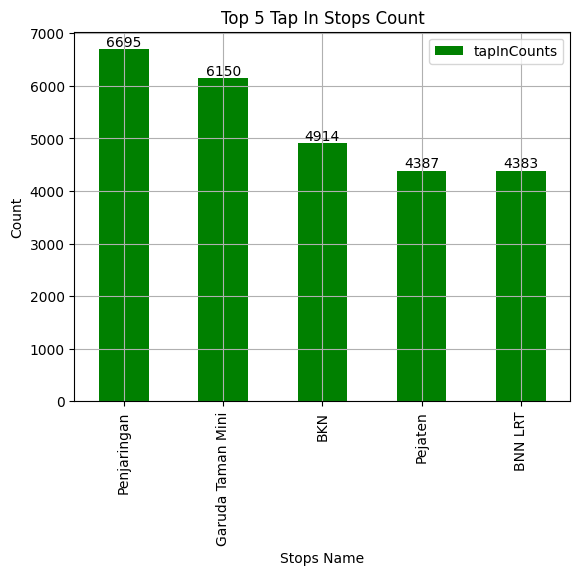

In [ ]:
t = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()
ax = t.plot(x='tapInStopsName', kind='bar', color='green')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap In Stops Count')
plt.show()

In [ ]:
tapIn_counts = df_eda.groupby(['tapInStopsName', 'tapInHour']).size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).drop_duplicates(subset='tapInStopsName', keep='first')

,tapInStopsName,tapInHour,tapInCounts
0,Penjaringan,17,1540
1,Garuda Taman Mini,6,1468
2,BKN,17,1252
3,Tirtayasa,5,1175
4,BNN LRT,17,1145
...,...,...,...
8230,Sbr. Masjid Jami Al Badariah Kemayoran,8,1
8231,Jln. Palatehan II,12,1
8232,Term. Muara Angke 1,8,1
8235,Gg. Harapan I Jagakarsa,7,1


In [ ]:
tapOut_counts = df_eda.groupby(['tapOutStopsName', 'tapOutHour']).size().reset_index(name='tapOutCounts')
tapOut_counts.rename(columns={'tapOutStopsName' : 'stopsName'}, inplace=True)
t = tapOut_counts.sort_values(by='tapOutCounts', ascending=False, ignore_index=True).head()
t

,stopsName,tapOutHour,tapOutCounts
0,Masjid Agung,6,1483
1,Ragunan,18,1340
2,BKN,18,1179
3,BKN,6,1138
4,Term. Senen,21,1062


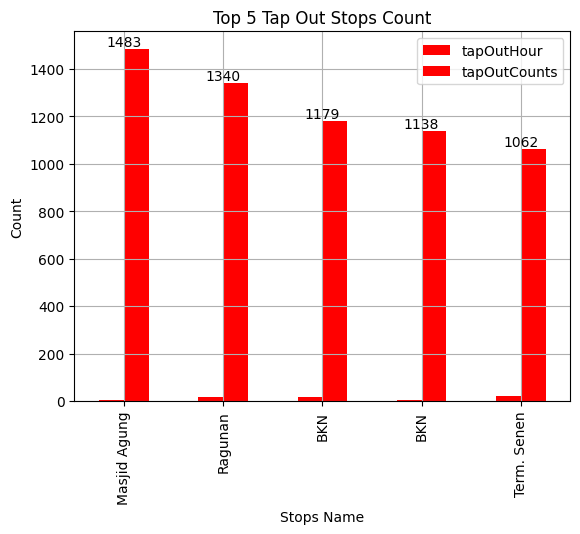

In [ ]:
ax = t.plot(x='stopsName', kind='bar', color='red')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapOutCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap Out Stops Count')
plt.show()

In [ ]:
cor = df_eda[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]
cor.drop_duplicates(inplace=True, ignore_index=True)
cor

c:\Users\user\Miniconda3\envs\fikri\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon
0,Pal Putih,-6.184631,106.84402,Tegalan,-6.203101,106.85715
1,Budi Utomo,-6.166063,106.83906,Pademangan,-6.133704,106.83164
2,Kemenkes 2,-6.228700,106.83302,Sampoerna Strategic,-6.217152,106.81892
3,Sawo Kecik Raya,-6.224852,106.85489,Stasiun Tebet,-6.225503,106.85814
4,Gg. Kunir II,-6.133132,106.81435,Simpang Kunir Kemukus,-6.133731,106.81475
...,...,...,...,...,...,...
4056,MTsN 37,-6.097910,106.70237,Puskesmas Kel. Kamal II,-6.100938,106.69786
4057,Sbr. SMPN 252,-6.239289,106.94229,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249
4058,Tosari,-6.196892,106.82309,SMK 57,-6.290967,106.82365
4059,Museum Textile,-6.188656,106.80954,JPO Blok G,-6.188861,106.81135


In [ ]:
res = cor.merge(transcount, on=['tapInStopsName', 'tapOutStopsName'])
res.sort_values(by='TransactionCount', ascending=False, ignore_index=True, inplace=True)
res

,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.792030,Rusun Kapuk Muara,-6.135667,106.762990,3413
1,Rusun Kapuk Muara,-6.135667,106.762990,Penjaringan,-6.126306,106.792030,3278
2,Garuda Taman Mini,-6.290154,106.881160,BKN,-6.257751,106.870000,3161
3,Simpang Danau Sunter Utara Barat,-6.139853,106.856630,Jembatan Item,-6.130078,106.854920,2721
4,Tanah Merdeka Arah Timur,-6.307866,106.873890,Kampung Rambutan,-6.309885,106.882160,2612
...,...,...,...,...,...,...,...
4056,Cempaka Timur,-6.166584,106.875910,Pulo Mas,-6.174736,106.892770,1
4057,PMI DKI Jakarta,-6.181486,106.838009,Bundaran Taman Gondangdia 1,-6.194297,106.833189,1
4058,SDN Pondok Jagung 1,-6.256261,106.651320,Batalyon Kavaleri 1,-6.252806,106.650640,1
4059,Pluit Sakti,-6.122386,106.794320,SDN Penjaringan 3,-6.125090,106.802540,1


In [ ]:
top10 = res.head(10)
top10

,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.792030,Rusun Kapuk Muara,-6.135667,106.762990,3413
1,Rusun Kapuk Muara,-6.135667,106.762990,Penjaringan,-6.126306,106.792030,3278
2,Garuda Taman Mini,-6.290154,106.881160,BKN,-6.257751,106.870000,3161
3,Simpang Danau Sunter Utara Barat,-6.139853,106.856630,Jembatan Item,-6.130078,106.854920,2721
4,Tanah Merdeka Arah Timur,-6.307866,106.873890,Kampung Rambutan,-6.309885,106.882160,2612
5,Garuda Taman Mini,-6.290154,106.881160,Pinang Ranti,-6.291075,106.886340,2360
6,Cibubur Junction,-6.368735,106.893660,BKN,-6.257751,106.870000,2313
7,Rusun Penjaringan,-6.130702,106.794870,Penjaringan,-6.126306,106.792030,2083
8,Penggilingan,-6.214132,106.939610,Rusun Komarudin,-6.208781,106.942520,1970
9,Departemen Kesehatan,-6.228794,106.833205,Patra Kuningan,-6.232677,106.832087,1914


In [ ]:
# Pusatkan peta pada koordinat tertentu (misalnya Jakarta)
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 10
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Tambahkan marker pada setiap titik pemberhentian
for index, row in top10.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        icon=folium.Icon(icon='cloud', color='green'),
        popup=row['tapInStopsName']
    ).add_to(m)

    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        icon=folium.Icon(icon='cloud', color='red'),
        popup=row['tapOutStopsName']
    ).add_to(m)

    # # Tambahkan polyline untuk menghubungkan titik-titik pemberhentian
    # folium.PolyLine(
    #     locations=[[row['tapInStopsLat'], row['tapInStopsLon']], [row['tapOutStopsLat'], row['tapOutStopsLon']]],
    #     color='blue'
    # ).add_to(m)

# Tampilkan peta
m

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
df_eda.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
1,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
2,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
3,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1
4,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,1


In [ ]:
clv = clv.merge(clv_, on='payCardName')

In [ ]:
clv.rename(columns={'payAmount' : 'Value'}, inplace=True)
clv

,payCardName,Recency,Frequency,Value
0,Bajragin Usada,27,1225,4287500.0
1,Gandi Widodo,27,1225,4287500.0
2,Emong Wastuti,27,1225,4287500.0
3,Surya Wacana,27,1296,4536000.0
4,Embuh Mardhiyah,27,1521,5323500.0
...,...,...,...,...
1912,Kamila Mahendra,9,1,3500.0
1913,Titi Siregar,12,1,3500.0
1914,drg. Zahra Nashiruddin,26,1,20000.0
1915,Ana Agustina,15,1,0.0


In [ ]:
data = clv
data

,payCardName,Recency,Frequency,Value
0,Bajragin Usada,27,1225,4287500.0
1,Gandi Widodo,27,1225,4287500.0
2,Emong Wastuti,27,1225,4287500.0
3,Surya Wacana,27,1296,4536000.0
4,Embuh Mardhiyah,27,1521,5323500.0
...,...,...,...,...
1912,Kamila Mahendra,9,1,3500.0
1913,Titi Siregar,12,1,3500.0
1914,drg. Zahra Nashiruddin,26,1,20000.0
1915,Ana Agustina,15,1,0.0


In [ ]:
columns_to_scale = ['Recency', 'Frequency', 'Value']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data

,payCardName,Recency,Frequency,Value
0,Bajragin Usada,0.931034,0.242857,0.148459
1,Gandi Widodo,0.931034,0.242857,0.148459
2,Emong Wastuti,0.931034,0.242857,0.148459
3,Surya Wacana,0.931034,0.256944,0.157064
4,Embuh Mardhiyah,0.931034,0.301587,0.184332
...,...,...,...,...
1912,Kamila Mahendra,0.310345,0.000000,0.000121
1913,Titi Siregar,0.413793,0.000000,0.000121
1914,drg. Zahra Nashiruddin,0.896552,0.000000,0.000693
1915,Ana Agustina,0.517241,0.000000,0.000000


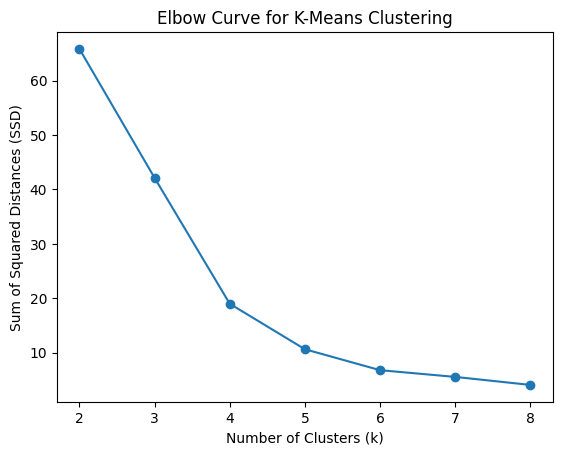

In [ ]:
# Define a range of number of clusters to try (from 2 to 10 clusters)
range_n_clusters = range(2,9)

# Calculate Sum of Squared Distances (SSD) for each value of k
ssd = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data[['Recency', 'Frequency', 'Value']])
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Curve for K-Means Clustering')
plt.show()

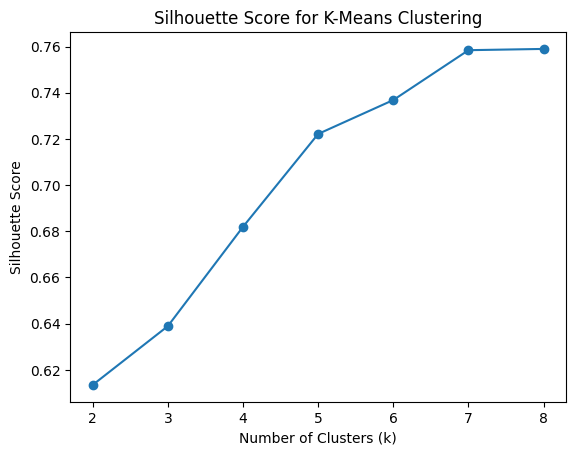

In [ ]:
# Define a range of number of clusters to try (from 2 to 10 clusters)
range_n_clusters = range(2, 9)

# Calculate Silhouette Score for each value of k
silhouette_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data[['Recency', 'Frequency', 'Value']])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data[['Recency', 'Frequency', 'Value']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

In [ ]:
ssd

[65.8497546068138,
 42.12184913009159,
 18.967165169335512,
 10.601623268547876,
 6.749615055271706,
 5.5110862135161955,
 4.03696381358771]

In [ ]:
# Perform K-Means Clustering with k=4 (4 clusters)
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data[['Recency', 'Frequency', 'Value']])
data

,payCardName,Recency,Frequency,Value,Cluster
0,Bajragin Usada,0.931034,0.242857,0.148459,1
1,Gandi Widodo,0.931034,0.242857,0.148459,1
2,Emong Wastuti,0.931034,0.242857,0.148459,1
3,Surya Wacana,0.931034,0.256944,0.157064,1
4,Embuh Mardhiyah,0.931034,0.301587,0.184332,1
...,...,...,...,...,...
1912,Kamila Mahendra,0.310345,0.000000,0.000121,2
1913,Titi Siregar,0.413793,0.000000,0.000121,2
1914,drg. Zahra Nashiruddin,0.896552,0.000000,0.000693,0
1915,Ana Agustina,0.517241,0.000000,0.000000,0


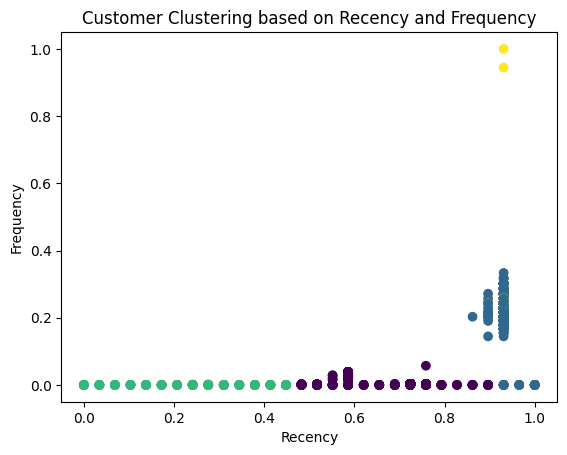

In [ ]:
# Scatter plot based on Recency and Frequency
plt.scatter(data['Recency'], data['Frequency'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Clustering based on Recency and Frequency')
plt.show()

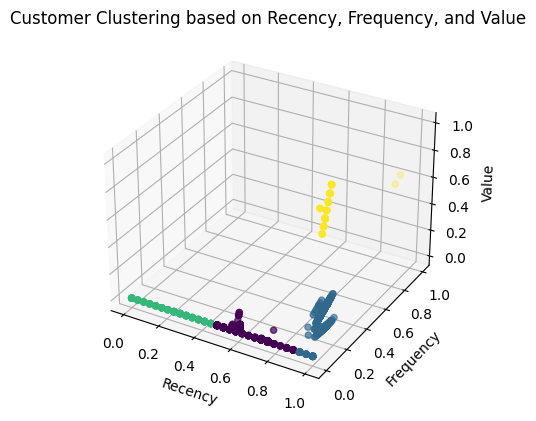

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot based on Recency, Frequency, and Value
ax.scatter(data['Recency'], data['Frequency'], data['Value'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Value')
ax.set_title('Customer Clustering based on Recency, Frequency, and Value')
plt.show()

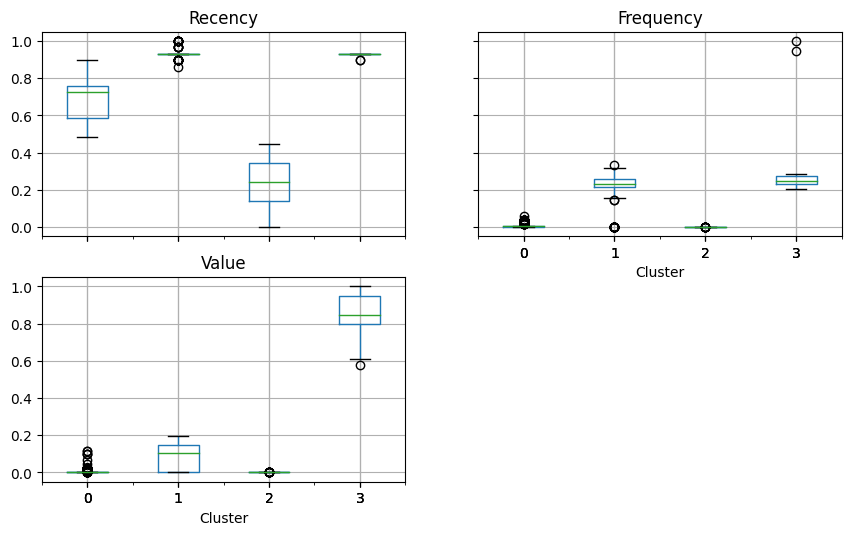

In [ ]:
data.boxplot(column=['Recency', 'Frequency', 'Value'], by='Cluster', figsize=(10, 6))
plt.suptitle('')
plt.show()

In [ ]:
data.groupby('Cluster').mean()

,Recency,Frequency,Value
Cluster,,,
0,0.682787,0.007213,0.003204
1,0.931576,0.227107,0.072901
2,0.234174,0.000049,0.000137
3,0.929310,0.284067,0.852170


In [ ]:
data.groupby('Cluster').describe()

Recency                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0         979.0  0.682787  0.093159  0.482759  0.586207  0.724138  0.758621   
1         764.0  0.931576  0.010579  0.862069  0.931034  0.931034  0.931034   
2         134.0  0.234174  0.137611  0.000000  0.137931  0.241379  0.344828   
3          40.0  0.929310  0.007611  0.896552  0.931034  0.931034  0.931034   

                  Frequency            ...                      Value  \
              max     count      mean  ...       75%       max  count   
Cluster                                ...                              
0        0.896552     979.0  0.007213  ...  0.002976  0.057143  979.0   
1        1.000000     764.0  0.227107  ...  0.256944  0.333333  764.0   
2        0.448276     134.0  0.000049  ...  0.000000  0.000595  134.0   
3        0.931034      40.0  0.284067  ...  0.271429  1.000000   40.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Cluster                                                                        
0        0.003204  0.009485  0.000000  0.000121  0.000727  0.001454  0.117036  
1        0.072901  0.073201  0.000000  0.000000  0.101922  0.148459  0.193906  
2        0.000137  0.000225  0.000000  0.000000  0.000121  0.000121  0.001627  
3        0.852170  0.102279  0.576991  0.800554  0.848338  0.948061  1.000000  

[4 rows x 24 columns]